In [ ]:
cpu_info = !lscpu
for inf_item in cpu_info.get_list():
  print(inf_item)

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2200.214
BogoMIPS:                        4400.42
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s eta 0:00:00
time: 409 µs (started: 2023-05-23 06:51:40 +00:00)


In [ ]:
import time

time: 430 µs (started: 2023-05-23 06:51:40 +00:00)


In [ ]:
def segmentation(image, state, max_iter, rank):
    image = img_as_float(image)
    height, width = image.shape[:2]
    changes = 1
    n = 0
    state_next = state.copy()

    while changes > 0 and n < max_iter:
        changes = 0
        n += 1
        for j in range(width):
            for i in range(height):
                C_p = image[i, j]
                S_p = state[i, j]
                for jj in range(max(0, j - rank),
                                min(j + rank + 1, width)):
                  for ii in range(max(0, i - rank),
                                  min(i + rank + 1, height)):
                        C_q = image[ii, jj]
                        S_q = state[ii, jj]
                        gc = 1 - np.sqrt(np.sum((C_q - C_p) ** 2)) / sqrt(3)
                        if gc * S_q[1] > S_p[1]:
                            state_next[i, j, 0] = S_q[0]
                            state_next[i, j, 1] = gc * S_q[1]
                            changes += 1
                            break
        state = state_next

    return n, state[:, :, 0]

time: 1.54 ms (started: 2023-05-23 06:51:40 +00:00)


<ipython-input-35-c11e7f633751>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = np.zeros(img.shape[0:2], dtype=np.int)


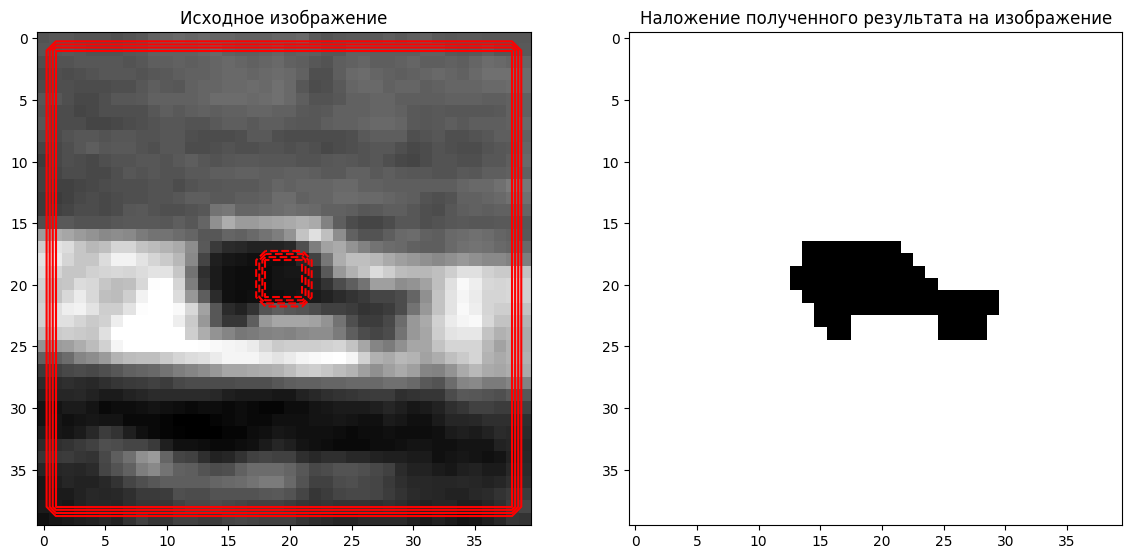

time: 9.01 s (started: 2023-05-23 07:32:29 +00:00)


In [ ]:
t0 = time.perf_counter()
from skimage import img_as_float
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
t1 = time.perf_counter()

t2 = time.perf_counter()
img = io.imread('AVTO1.gif')
t3 = time.perf_counter()
labels = np.zeros(img.shape[0:2], dtype=np.int)

reg = 1
reg_target = 2
height, width = img.shape[:2]

grass = 1
target = -1

labels[0:reg, :] = grass
labels[height-reg:, :] = grass
labels[reg:, 0:reg] = grass
labels[reg:, width-reg:] = grass

labels[int(height/2 - reg_target):int(height/2 + reg_target),
       int(width/2 - reg_target):int(width/2 + reg_target)] = target

strength = np.zeros_like(labels, dtype=np.float64)

strength[np.nonzero(labels)] = 1.0
t4 = time.perf_counter()
n, growcut_labels = segmentation(img, np.dstack((labels, strength)), rank=2, max_iter=150)
t5 = time.perf_counter()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.imshow(img, cmap='gray')
ax1.contour(labels, colors='r')
ax1.set_title('Исходное изображение')
ax2.set_title('Наложение полученного результата на изображение');
ax2.imshow(growcut_labels, cmap='gray')
t6 = time.perf_counter()

(-0.5, 39.5, 39.5, -0.5)

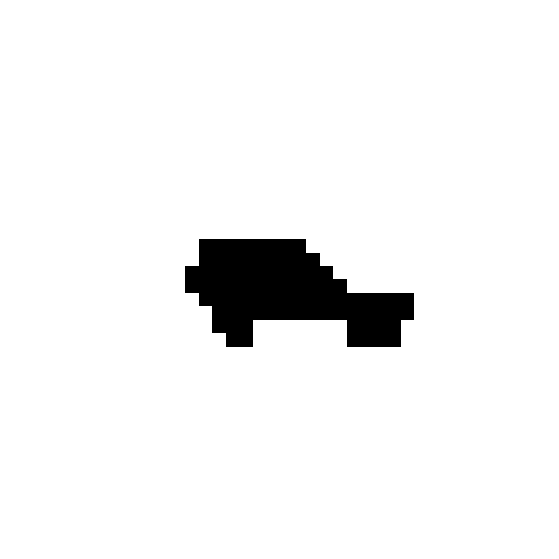

time: 144 ms (started: 2023-05-23 07:32:45 +00:00)


In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.imshow(growcut_labels, cmap='gray')
ax1.axis('off')

In [ ]:
number_of_black_pix = np.sum(growcut_labels == -1)
print('Number of black pixels:', number_of_black_pix)

Number of black pixels: 84
time: 11.1 ms (started: 2023-05-23 09:34:32 +00:00)


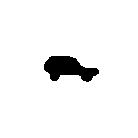

time: 5.32 ms (started: 2023-05-23 09:57:51 +00:00)


In [ ]:
from PIL import Image
import cv2 as cv
image_path = '/content/mask.gif'

img = Image.open(image_path)
n#ew_image = img.resize((40, 40))
img.show()

In [ ]:
import cv2
image = cv2.imread("agc_mask.png", 0)
count = cv2.countNonZero(image)
print(count)
number_of_black_pix = np.sum(image == 255)
print('Number of black pixels:', number_of_black_pix)

297226
Number of black pixels: 297226
time: 13.9 ms (started: 2023-05-23 10:18:12 +00:00)


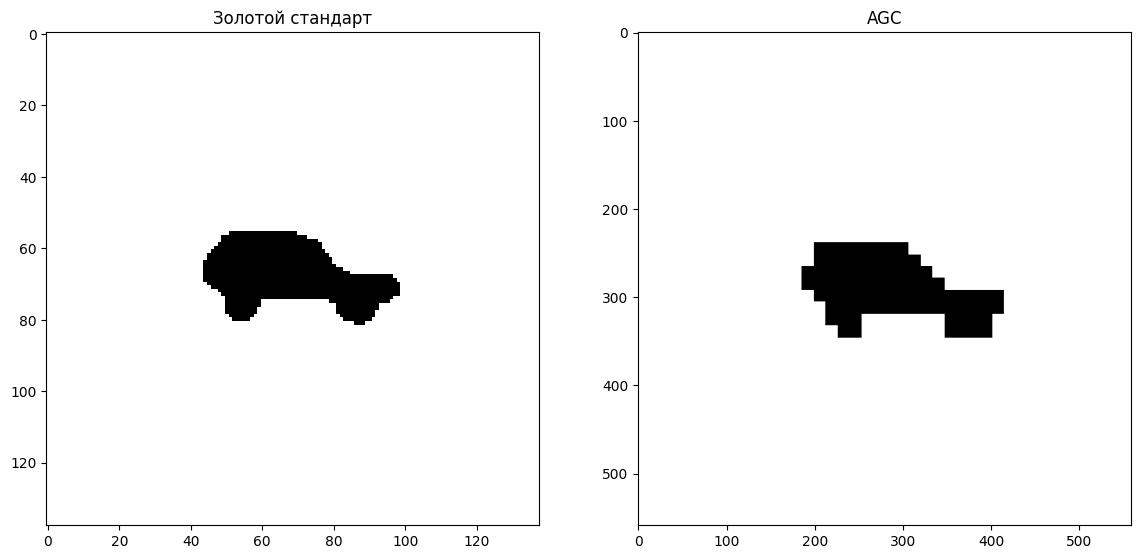

time: 1.45 s (started: 2023-05-23 09:29:21 +00:00)


In [ ]:
img_1 = io.imread('mask.gif')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.imshow(img_1, cmap='gray')
ax1.set_title('Золотой стандарт')
ax2.set_title('AGC');
ax2.imshow(img)
t6 = time.perf_counter()

In [ ]:
number_of_black_pix = np.sum(img == 254)
print('Number of black pixels:', number_of_black_pix)

Number of black pixels: 0
time: 1.91 ms (started: 2023-05-23 09:51:57 +00:00)


In [ ]:
print('Подключение библиотек:',t1-t0)
print('Функция сегментации:',t2-t1)
print('Чтение изображения:',t3-t2)
print('Автоматическая разметка:',t4-t3)
print('Сегментация %s сек. (%s итераций)'% (t5-t4, n))
print('Вывод результата:',t6-t5)
print('Общее время:',t6-t0)

Тест на использование памяти

In [ ]:
!pip install line_profiler
%load_ext line_profiler

In [ ]:
!pip install pympler
from pympler import summary, muppy

In [ ]:
!pip install line_profiler
#Load the module
%load_ext line_profiler

In [ ]:
import cProfile

!pip install line_profiler
%load_ext line_profiler

In [ ]:
sum1 = muppy.get_objects()
list1=[]
from skimage import img_as_float
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
def growcut(image, state, max_iter, rank):

    image = img_as_float(image)
    height, width = image.shape[:2]

    changes = 1
    n = 0
    state_next = state.copy()

    while changes > 0 and n < max_iter:
        changes = 0
        n += 1

        for j in range(width):
            for i in range(height):
                C_p = image[i, j]
                S_p = state[i, j]
                for jj in range(max(0, j - rank), min(j + rank + 1, width)):
                  for ii in range(max(0, i - rank), min(i + rank + 1, height)):
                        C_q = image[ii, jj]
                        S_q = state[ii, jj]
                        gc = 1 - np.sqrt(np.sum((C_q - C_p) ** 2)) / sqrt(3)
                        if gc * S_q[1] > S_p[1]:
                            state_next[i, j, 0] = S_q[0]
                            state_next[i, j, 1] = gc * S_q[1]
                            changes += 1
                            break

        state = state_next

    return n, state[:, :, 0]

img = io.imread('AVTO1.gif')

labels = np.zeros(img.shape[0:2], dtype=np.int)

reg = 1
reg_target = 3
height, width = img.shape[:2]

grass = -1
target = 1

labels[0:reg, :] = grass
labels[height-reg:, :] = grass
labels[reg:, 0:reg] = grass
labels[reg:, width-reg:] = grass

labels[int(height/2 - reg_target):int(height/2 + reg_target),
       int(width/2 - reg_target):int(width/2 + reg_target)] = target

strength = np.zeros_like(labels, dtype=np.float64)

strength[np.nonzero(labels)] = 1.0

n, growcut_labels = growcut(img, np.dstack((labels, strength)), rank=2, max_iter=150)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.imshow(img, cmap='gray')
ax1.contour(labels, colors='r')
ax1.set_title('Исходное изображение')
ax2.set_title('Наложение полученного результата на изображение');
ax2.imshow(img, cmap='gray')
ax2.contour(growcut_labels, colors='r')
sum2 = muppy.get_objects()

In [ ]:
summary.print_(summary.get_diff(summary.summarize(sum1), summary.summarize(sum2)))

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.imshow(img, cmap='gray')
ax1.contour(labels, colors='r')
ax1.set_title('Исходное изображение')
ax2.set_title('Наложение полученного результата на изображение');
ax2.imshow(img, cmap='gray')
ax2.contour(growcut_labels, colors='r')
